In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("G:/My Drive/gld_price_data.csv")

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.SPX=df.SPX.astype(int)

In [8]:
df.GLD=df.GLD.astype(int)

In [9]:
df.USO =df.USO.astype(int)

In [10]:
df.SLV=df.SLV.astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   int32  
 2   GLD      2290 non-null   int32  
 3   USO      2290 non-null   int32  
 4   SLV      2290 non-null   int32  
 5   EUR/USD  2290 non-null   float64
dtypes: float64(1), int32(4), object(1)
memory usage: 71.7+ KB


In [12]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1653.822271,122.232314,31.351965,19.598253,1.283653
std,519.113306,23.293917,19.517177,7.104057,0.131547
min,676.000000,70.000000,7.000000,8.000000,1.039047
25%,1239.250000,109.000000,14.000000,15.000000,1.171313
50%,1551.000000,120.000000,33.000000,17.000000,1.303297
75%,2072.750000,132.000000,37.000000,22.000000,1.369971
max,2872.000000,184.000000,117.000000,47.000000,1.598798


In [14]:
df.corr(numeric_only=True)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049319,-0.591407,-0.272631,-0.672024
GLD,0.049319,1.000000,-0.186053,0.865589,-0.024544
USO,-0.591407,-0.186053,1.000000,0.166668,0.828870
SLV,-0.272631,0.865589,0.166668,1.000000,0.321817
EUR/USD,-0.672024,-0.024544,0.828870,0.321817,1.000000


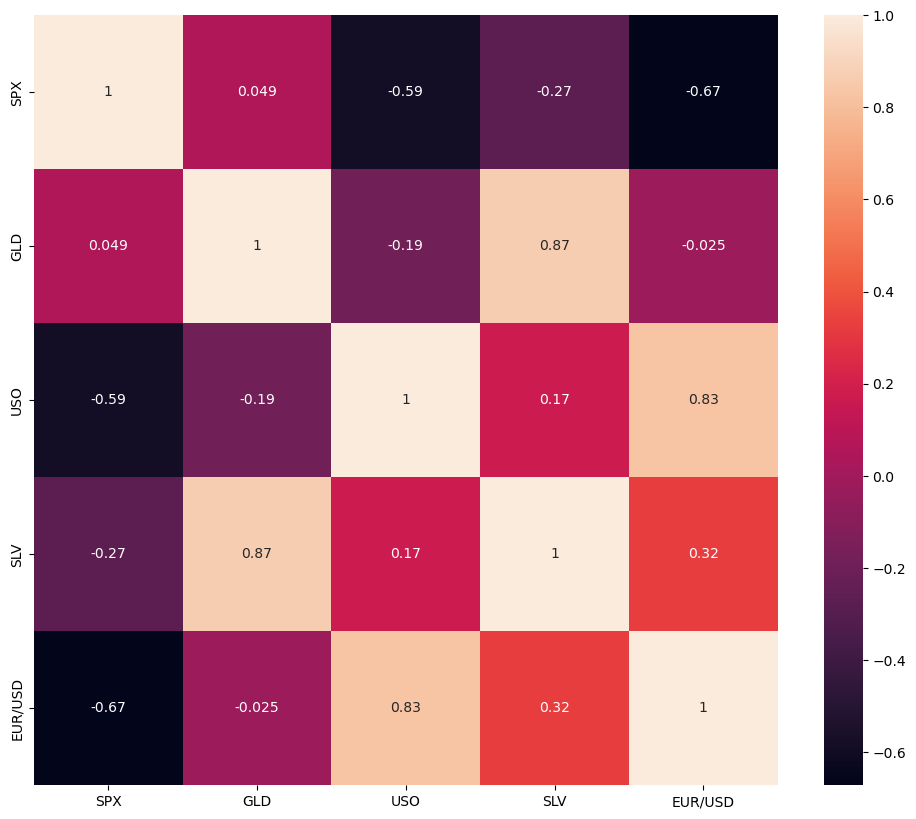

In [15]:
plt.figure(figsize=[12,10])
sns.heatmap(data=df.corr(numeric_only=True),annot=True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


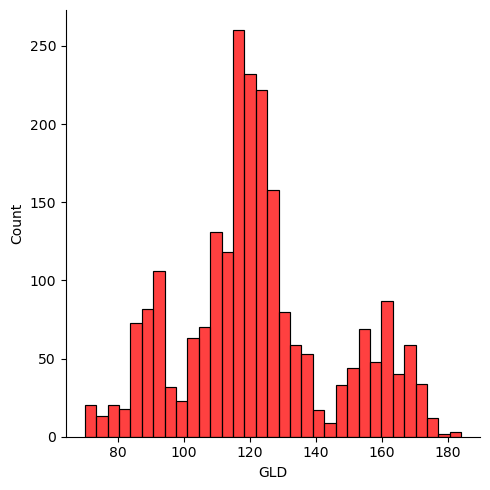

In [16]:
sns.displot(df["GLD"],color='red')

In [17]:
x=df.drop(["Date","GLD"],axis=1)
y=df["GLD"]

In [18]:
x

,SPX,USO,SLV,EUR/USD
0,1447,78,15,1.471692
1,1447,78,15,1.474491
2,1411,77,15,1.475492
3,1416,75,15,1.468299
4,1390,76,15,1.557099
...,...,...,...,...
2285,2671,14,15,1.186789
2286,2697,14,15,1.184722
2287,2723,14,15,1.191753
2288,2730,14,15,1.193118


In [19]:
y

0        84
1        85
2        85
3        84
4        86
       ... 
2285    124
2286    124
2287    125
2288    124
2289    122
Name: GLD, Length: 2290, dtype: int32

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [21]:
x_train

,SPX,USO,SLV,EUR/USD
1632,2104,19,16,1.088886
1526,2026,23,16,1.239495
247,735,27,12,1.267893
1878,2097,10,18,1.106574
194,899,35,10,1.301406
...,...,...,...,...
1987,2269,11,15,1.050089
1283,1767,33,20,1.340932
1414,1927,37,18,1.360415
1691,1969,15,14,1.120737


In [22]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array([120.07, 119.2 , 159.33, 166.83, 148.4 , 124.74, 128.89,  87.82,
        90.01, 131.01, 116.58, 171.33, 145.06, 120.62, 121.46, 123.5 ,
        90.91,  90.49,  92.58, 167.26, 109.6 , 119.38, 109.28, 137.72,
       128.18,  89.19, 146.03, 126.96, 124.25,  80.13,  83.64, 134.03,
       145.92, 151.18,  82.  , 131.97, 154.  , 107.87, 126.05, 121.65,
       164.49, 114.94, 110.78, 131.88, 112.82,  74.85, 147.61, 112.82,
       117.16, 117.26, 119.4 , 158.87,  87.15, 128.42, 102.16,  90.64,
       154.28, 116.01, 120.4 , 121.78, 149.51, 120.55, 130.12, 114.24,
       171.13, 147.65, 153.9 , 102.34, 169.31, 136.57, 147.84,  97.99,
       120.86, 153.11, 132.24, 120.28, 167.79, 110.33, 104.2 , 116.45,
        71.17,  85.79, 168.97, 122.71,  89.46, 134.02,  88.61, 159.1 ,
       126.8 , 124.  , 126.7 , 159.42, 123.71, 118.05, 125.19, 119.41,
       117.48, 158.91, 107.21, 151.81, 118.9 , 154.23, 112.97, 145.95,
       125.52, 111.91, 126.36,  74.86, 114.57, 163.72, 124.51, 117.44,
      

In [25]:
mse=mean_squared_error(y_test,y_pred)

In [26]:
mse

9.984875109170305

In [27]:
r_sqr=r2_score(y_pred,y_test)

In [28]:
r_sqr

0.9827538925698791

In [29]:
y_test=list(y_test)

In [30]:
y_test

[119,
 115,
 161,
 167,
 169,
 124,
 128,
 86,
 89,
 131,
 116,
 171,
 146,
 120,
 122,
 124,
 90,
 88,
 94,
 168,
 112,
 120,
 110,
 140,
 128,
 89,
 148,
 127,
 124,
 80,
 85,
 134,
 148,
 156,
 84,
 132,
 155,
 108,
 127,
 124,
 166,
 112,
 112,
 132,
 114,
 80,
 158,
 113,
 119,
 117,
 118,
 161,
 87,
 127,
 102,
 91,
 157,
 115,
 118,
 121,
 150,
 120,
 132,
 117,
 173,
 159,
 152,
 103,
 173,
 131,
 146,
 97,
 120,
 156,
 130,
 120,
 167,
 110,
 109,
 116,
 73,
 87,
 160,
 122,
 88,
 129,
 90,
 157,
 127,
 124,
 127,
 161,
 121,
 117,
 124,
 120,
 120,
 161,
 108,
 152,
 116,
 154,
 113,
 145,
 127,
 113,
 127,
 75,
 117,
 164,
 126,
 116,
 121,
 169,
 129,
 119,
 126,
 150,
 91,
 121,
 116,
 171,
 127,
 120,
 115,
 115,
 122,
 131,
 170,
 78,
 121,
 117,
 123,
 90,
 128,
 134,
 136,
 107,
 112,
 167,
 125,
 127,
 131,
 121,
 118,
 115,
 121,
 89,
 159,
 121,
 133,
 120,
 157,
 89,
 82,
 161,
 118,
 130,
 118,
 83,
 115,
 165,
 124,
 119,
 119,
 95,
 107,
 116,
 124,
 129,
 91,
 

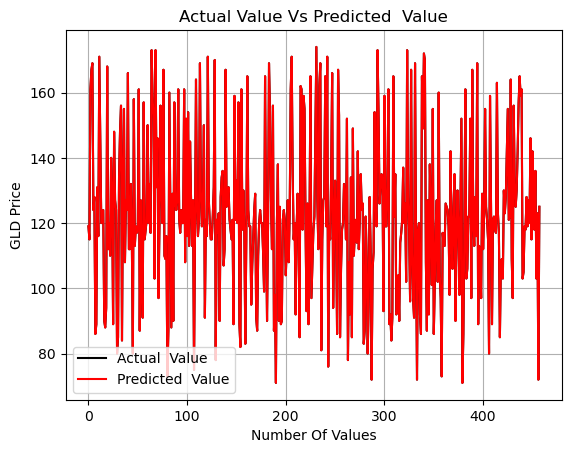

In [31]:
plt.plot(y_test,color='black',label='Actual  Value')
plt.plot(y_test,color='red',label='Predicted  Value')
plt.title("Actual Value Vs Predicted  Value")
plt.xlabel("Number Of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.grid()
plt.show()
